# Visualización y análisis estadístico de las características de CMH

<AxesSubplot:xlabel='Status', ylabel='Volume'>

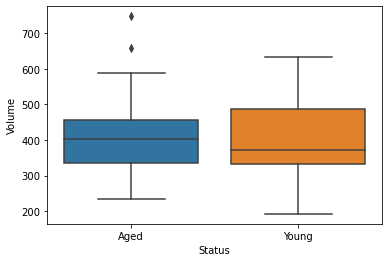

In [6]:
import pandas as pd
import seaborn as sns
# Carga del dataset que contiene los datos morfométricos
xls2 = pd.ExcelFile("C:/Users/cdedi/Desktop/working_dataset.xlsx")
stat = xls2.parse(index_col=None, na_values=['NA'])
stat.columns = stat.columns.str.replace(' ', '')
# Representación boxplot del volumen
sns.boxplot(x= "Status", y= "Volume", data=stat)

[Text(0, 0.5, 'Area del centro de la CMH')]

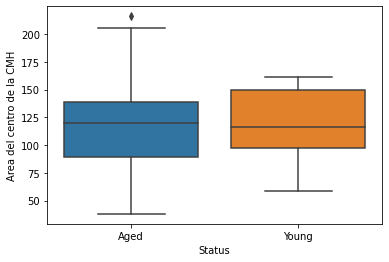

In [7]:
# Representación boxplot del área del plano central
ax = sns.boxplot(x= "Status", y= "CentralArea", data=stat)
ax.set(ylabel='Area del centro de la CMH')

In [8]:
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

# Separamos ambos grupos según su fenotipo de envejecimiento
aged_stat = stat[stat['Status']=='Aged']
young_stat = stat[stat['Status']=='Young']

# Testamos la normalidad de los grupos para volumen
print(shapiro(aged_stat['Volume']))
print(shapiro(young_stat['Volume']))

# Realizamos test de Mann-Whitney (uno de los grupos no sigue una distribución normal)
print(mannwhitneyu(aged_stat['Volume'], young_stat['Volume']))

ShapiroResult(statistic=0.9538621306419373, pvalue=0.049262482672929764)
ShapiroResult(statistic=0.95986407995224, pvalue=0.5990071296691895)
MannwhitneyuResult(statistic=436.5, pvalue=0.4282932419307385)


In [9]:
from scipy.stats import ttest_ind, shapiro

# Testamos la normalidad de los grupos para área del plano central
print(shapiro(aged_stat['CentralArea']))
print(shapiro(young_stat['CentralArea']))

# Realizamos test t-Student (ambos grupos siguen una distribución normal)
print(ttest_ind(aged_stat['CentralArea'], young_stat['CentralArea']))

ShapiroResult(statistic=0.9841088652610779, pvalue=0.7327223420143127)
ShapiroResult(statistic=0.9184412360191345, pvalue=0.12130988389253616)
Ttest_indResult(statistic=0.0932054892382872, pvalue=0.9260226742164049)
